<a href="https://colab.research.google.com/github/hiyoman/ai/blob/main/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%20%ED%9A%8C%EA%B7%80%20(%EC%88%98%EC%88%98%EC%A0%95).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd

Saving 도로살얼음 데이터정리2.csv to 도로살얼음 데이터정리2 (2).csv


In [2]:
import numpy as np
df = pd.read_csv(io.StringIO(uploaded['도로살얼음 데이터정리2.csv'].decode('cp949')))

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


In [4]:
x = df.drop(['마찰계수','YYMMDD','HHMMSS','1시간 뒤 마찰계수','5시간 뒤 마찰계수'], axis = 1)
target = df['5시간 뒤 마찰계수'].values

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136546 entries, 130836 to 191616
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   5시간 평균 대기온도  136546 non-null  float64
 1   대기온도         136546 non-null  float64
 2   대기습도         136546 non-null  float64
 3   기압           136546 non-null  float64
 4   5시간 평균 노면온도  136546 non-null  float64
 5   노면온도         136546 non-null  float64
 6   시간 강수량       136546 non-null  float64
 7   6시간 누적 강수량   136546 non-null  float64
dtypes: float64(8)
memory usage: 9.4 MB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size = 0.3)

In [8]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.values.reshape(-1,8), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [9]:
y_pred = regressor.predict(X_test.values.reshape(-1,8))
y_pred

array([0.80945864, 0.81532201, 0.81998173, ..., 0.81999355, 0.81999928,
       0.79774346])

In [10]:
y_test

array([0.8091013, 0.8154169, 0.8200001, ..., 0.8200001, 0.8200001,
       0.7975699])

In [11]:
df1 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df1

,Real Values,Predicted Values
0,0.809101,0.809459
1,0.815417,0.815322
2,0.820000,0.819982
3,0.820000,0.819997
4,0.820000,0.820000
...,...,...
58515,0.820000,0.819988
58516,0.820000,0.819990
58517,0.820000,0.819994
58518,0.820000,0.819999


In [12]:
df

,YYMMDD,HHMMSS,5시간 평균 대기온도,대기온도,대기습도,기압,5시간 평균 노면온도,노면온도,시간 강수량,6시간 누적 강수량,마찰계수,5시간 뒤 마찰계수,1시간 뒤 마찰계수
0,201113,151600,14.400000,14.4,44.6,979.6,21.845960,21.84596,0.0,0.0,0.82,0.815091,0.82
1,201113,151700,14.350000,14.3,45.1,979.6,21.806780,21.76760,0.0,0.0,0.82,0.815148,0.82
2,201113,151800,14.333333,14.3,45.0,979.6,21.779747,21.72568,0.0,0.0,0.82,0.815270,0.82
3,201113,151900,14.325000,14.3,44.4,979.7,21.768197,21.73355,0.0,0.0,0.82,0.815220,0.82
4,201113,152000,14.340000,14.4,44.6,979.7,21.764876,21.75159,0.0,0.0,0.82,0.815122,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195061,210423,62000,15.934552,14.8,22.9,974.0,16.968801,14.97446,0.0,0.0,0.82,0.820000,0.82
195062,210423,62100,15.928571,14.9,23.0,974.0,16.952692,15.00210,0.0,0.0,0.82,0.820000,0.82
195063,210423,62200,15.922591,14.9,23.1,974.0,16.936677,14.98944,0.0,0.0,0.82,0.820000,0.82
195064,210423,62300,15.916611,14.9,23.0,974.0,16.920679,14.98939,0.0,0.0,0.82,0.820000,0.82


In [13]:
 from sklearn.metrics import mean_squared_error
 mse = np.sqrt(mean_squared_error(y_pred, y_test))
 rmse = np.sqrt(mse)

In [14]:
print('mse : ', mse)
print('rmse : ', rmse)

mse :  0.005024190316319043
rmse :  0.07088152309536698


In [15]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


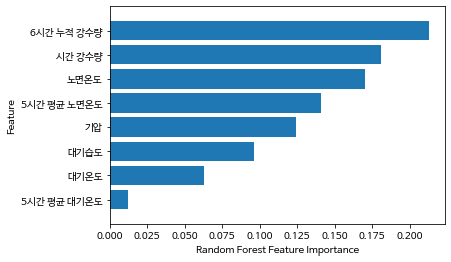

In [16]:
def plot_feature_importance(model):
  n_features = X_train.shape[1] 
  plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
  plt.yticks(np.arange(n_features), X_train.columns)
  plt.xlabel("Random Forest Feature Importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
    
    
plot_feature_importance(regressor)

In [55]:
answer = pd.DataFrame(test_y[:100].reset_index())
del answer["index"]

plt.plot(answer, label="answer")
plt.plot(forest_reg.predict(test_set_X[:100]), label="predict")
plt.legend()

NameError: ignored

In [17]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE) : ", mean_absolute_error(y_test,y_pred))
r2 =  r2_score(y_test, y_pred)
print("R Squared (R2) : ",r2)

Mean Absolute Error(MAE) :  0.000682114928150207
R Squared (R2) :  0.9963741674914068


In [18]:
y_pred

array([0.80945864, 0.81532201, 0.81998173, ..., 0.81999355, 0.81999928,
       0.79774346])

In [63]:
def get_surface_state(real):
    text = text.rstrip()
    text = text.lstrip()
    
    if real >= 0.8 :
        return "관찰"
    elif 0.6 <= real < 0.8 :
        return "주의"
    elif real < 0.6 :
        return "경계"

In [20]:
col_name = ['예측결과']
df2 = pd.DataFrame(y_pred, columns=col_name)


In [21]:
df2

,예측결과
0,0.809459
1,0.815322
2,0.819982
3,0.819997
4,0.820000
...,...
58515,0.819988
58516,0.819990
58517,0.819994
58518,0.819999
